## Eye tracking and Gaze Analysis

**Abhinay Krishna Vellala**

In this notebook, I have done an analysis on the gaze points and the inferences we can make from it. For this, we have the gaze data, xray image and a meta file. 

From the Xray report, I understand the report's left and right lungs based on the position of the heart. But, when I was referring the images and plots, I referred them as right of the image(where left lung is) and left of the image(where right lung is) interchangably. Please make a note of this. I proofread my report several times and many apologies if you still find any mistake in referring to the left and right of the image or lungs. 

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Gaze Example/gaze.csv")
print(df.shape)
df.head()

(1990, 22)


,Unnamed: 0,x,y,timestamp,gaze_point_validity,left_x,left_y,left_z,right_x,right_y,...,left_validity,right_validity,head_pos_x,head_pos_y,head_pos_z,head_rot_x,head_rot_y,head_rot_z,head_timestamp,head_validity
0,0,2292.0,1525.0,1.984693e+10,1.0,-3.056111,74.432755,570.221802,59.156101,71.958862,...,1.0,1.0,12.238708,85.035507,721.476257,0.193725,0.143565,-0.088005,1.963005e+10,1.0
1,1,1920.0,1125.0,1.984906e+10,1.0,-3.543825,74.968689,571.381775,59.101250,69.640869,...,1.0,1.0,12.238708,85.035507,721.476257,0.193725,0.143565,-0.088005,1.963005e+10,1.0
2,2,1920.0,1125.0,1.984906e+10,1.0,-3.543825,74.968689,571.381775,59.101250,69.640869,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0
3,3,1914.0,1124.0,1.984907e+10,1.0,-3.582902,75.032303,571.283875,59.064003,69.761871,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0
4,4,1901.0,1130.0,1.984908e+10,1.0,-3.617882,75.097473,571.155518,59.027313,69.895248,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0


In [3]:
import json
with open("../Gaze Example/meta.json") as file:
    meta = json.load(file)
print(meta)

{'radiologist': 'b', 'fname': '00dc70e84d141255f7fc6f8038bdd72e.png', 'global_ind': 201, 'num_part': 2, 'num_img': 4, 'x0': 1033, 'y0': 37, 'win_width': 2160, 'win_height': 1773}


The meta file has some data regarding the properties of the image and gaze points. It is more interesting to see there is `x0` and `y0` in the meta file.

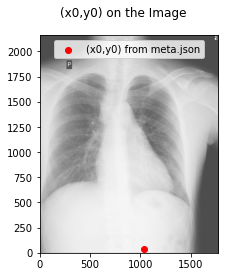

In [4]:
img = Image.open(f"../Gaze Example/{meta['fname']}").convert("RGB")
plt.imshow(np.flipud(img), origin='lower', alpha=0.7)
plt.scatter(meta['x0'], meta['y0'], c='red', label='(x0,y0) from meta.json')
plt.legend(loc='upper center')
plt.suptitle("(x0,y0) on the Image")
plt.show()

The plot shows that point (x0,y0) is an interesting observation which is at the bottom of the image. 

**Note: matplotlib imshow() function plots with inverted y-axis, for the image above, I have flipped y-axis in the plot. However, from here on, I have inverted the y coordinates of the data to match with the image coordiantes**

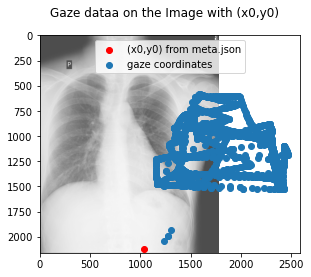

In [5]:
# img = Image.open(f"../Gaze Example/{meta['fname']}").convert("RGB")
plt.imshow(img, alpha=0.7)
plt.scatter(meta['x0'], np.array(img).shape[0] - meta['y0'], c='red', label='(x0,y0) from meta.json')
plt.scatter(df['x'], df['y'], label='gaze coordinates')
plt.legend(loc='upper center')
plt.suptitle("Gaze dataa on the Image with (x0,y0)")
plt.show()

When you look at the plot, the coordinates of gaze data doesn't seem to match with the coordinates of the image. The gaze coordinates are far to the right. The coordinates from meta.json file must imply the origin of the image.  

In [6]:
x0 = meta['x0']
y0 = meta['y0']
img_array = np.array(img)
x0, y0, img_array.shape

(1033, 37, (2160, 1773, 3))

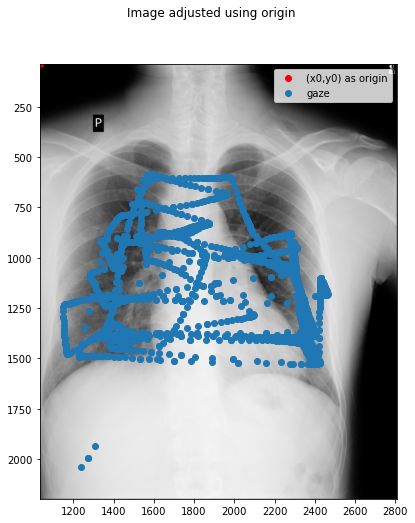

In [7]:
plt.figure(figsize=(8,8))
# plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
extent = [x0, img_array.shape[1]+x0, img_array.shape[0]+y0, y0]
plt.imshow(img, extent=extent)
plt.scatter(meta['x0'], meta['y0'], c='red', label='(x0,y0) as origin')
plt.scatter(df['x'], df['y'], label='gaze')#.apply(lambda y: -y)) .iloc[::-1]
# plt.vlines(df['x'].median(), ymin=y0, ymax=img_array.shape[0]+y0, colors ='black')
# plt.hlines(df['y'].median(), xmin=x0, xmax=img_array.shape[1]+x0, colors ='black')
plt.suptitle("Image adjusted using origin")
plt.legend()
plt.show()

Now, the image looks adjusted to the gaze coordinates. 

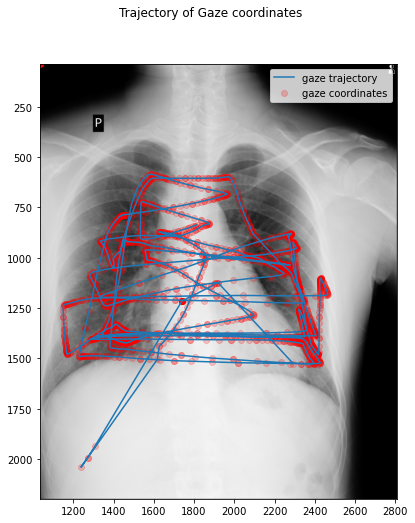

In [8]:
plt.figure(figsize=(8,8))
extent = [x0, img_array.shape[1]+x0, img_array.shape[0]+y0, y0]
plt.imshow(img, extent=extent)
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.plot(df['x'], df['y'], label = 'gaze trajectory')
# plt.scatter(df['x'], df['y'], s=50, facecolors='none', edgecolors='red', label='gaze coordinates', alpha=0.2)
plt.scatter(df['x'], df['y'], c='r', label='gaze coordinates', alpha=0.2)
# plt.vlines(df['x'].median(), ymin=37, ymax=2160, colors ='red')
plt.suptitle("Trajectory of Gaze coordinates")
plt.legend()
plt.show()

This is another plot to show the trajectory of the gaze coordinates. This is done to understand the path viewer has followed to look into the image. This helped me to understand more about the trajectories and persceptive of the viewer

#### Heatmap of the gaze points

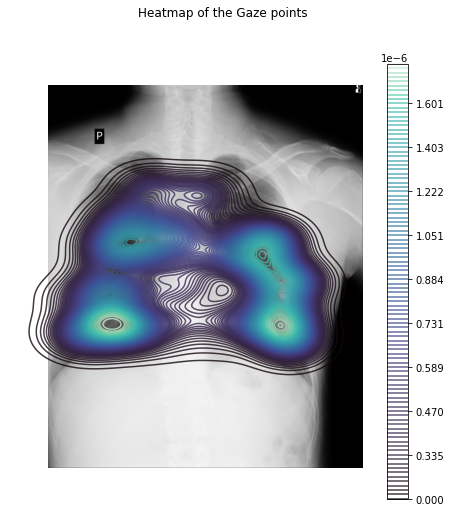

In [9]:
plt.figure(figsize=(8,8))
extent = [x0, img_array.shape[1]+x0, img_array.shape[0]+y0, y0]
plt.imshow(img, extent=extent)
sns.kdeplot(x=df['x'], y=df['y'], 
            fill=False, thresh=0, levels=100, cbar=True, cmap="mako", alpha=0.8, legend=True)
plt.axis("off")
plt.suptitle("Heatmap of the Gaze points")
plt.show()

From the above heatmap it is clear that the viewer observed at the bottom of the lungs more times than at the top. Especially, viewer looked at the right lung more number of times than the left lung. 

#### Knowing the gaze table 

To understand the gaze table more, I looked into the mean, standard deviation, quantile ranges, minimum and maximum values of each column in the data. I have also performed the **Shapiro-Wilk test** for normality.

In [10]:
# removing unimportant column Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

In [11]:
# get mean, std, quantiles, min, max
df.describe()

,x,y,timestamp,gaze_point_validity,left_x,left_y,left_z,right_x,right_y,right_z,...,left_validity,right_validity,head_pos_x,head_pos_y,head_pos_z,head_rot_x,head_rot_y,head_rot_z,head_timestamp,head_validity
count,1990.000000,1990.000000,1.990000e+03,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,...,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03,1990.0
mean,1845.705025,1142.836181,1.985734e+10,0.993970,-14.945155,74.050205,567.813502,47.167244,74.517729,566.037896,...,0.993970,0.996985,7.232475,90.271405,721.378170,0.279192,0.211543,-0.116488,1.964191e+10,1.0
std,412.956185,251.251771,4.798496e+06,0.077439,2.606567,1.176432,1.745516,2.754954,1.357229,1.795885,...,0.077439,0.054841,2.142114,4.078403,8.449613,0.034735,0.037690,0.019941,4.802179e+06,0.0
min,1150.000000,585.000000,1.984693e+10,0.000000,-20.939671,70.796677,564.586853,40.382618,69.640869,562.672302,...,0.000000,0.000000,1.294426,79.375626,699.958008,0.170154,0.081457,-0.190859,1.963005e+10,1.0
25%,1445.000000,938.000000,1.985319e+10,1.000000,-16.144519,73.593731,566.657288,45.958996,73.886353,564.817429,...,1.000000,1.000000,6.289528,88.417023,716.973083,0.283275,0.191649,-0.118277,1.963775e+10,1.0
50%,1803.500000,1171.000000,1.985735e+10,1.000000,-15.454153,74.314972,567.465424,46.663933,74.722572,565.665039,...,1.000000,1.000000,7.005810,91.021835,721.358826,0.288512,0.215227,-0.114871,1.964193e+10,1.0
75%,2292.750000,1382.000000,1.986150e+10,1.000000,-14.465170,74.736313,568.752487,47.728054,75.550476,566.991074,...,1.000000,1.000000,7.828999,92.364182,723.902542,0.294271,0.229769,-0.109693,1.964607e+10,1.0
max,2464.000000,2040.000000,1.986564e+10,1.000000,-3.056111,77.806519,577.007080,59.156101,77.057449,575.086487,...,1.000000,1.000000,14.411537,101.236893,751.943726,0.353105,0.376276,-0.074734,1.965021e+10,1.0


Although, (x,y) are the pixel coordinates, they don't mean anything here. However, it is interesting to see columns like `left_x, left_y, right_x, right_y, right_z` and head position coordinates having different mean but the standard deviation range is similar.

In [12]:
# Shapiro-Wilk test
from scipy import stats
for col in df.columns:
#     if col != 'x' or col != 'y':
    shapiro_test = stats.shapiro(df[col])
    p = shapiro_test.pvalue
    if p > 0.05:
        print(f"{col}: P-value = {p}, Distribution: Normal")
    else:
        print(f"{col}: P-value = {p}, Distribution: Not Normal")

x: P-value = 8.669417200136372e-35, Distribution: Not Normal
y: P-value = 8.140845847540339e-25, Distribution: Not Normal
timestamp: P-value = 3.344139543843366e-24, Distribution: Not Normal
gaze_point_validity: P-value = 0.0, Distribution: Not Normal
 left_x: P-value = 0.0, Distribution: Not Normal
left_y: P-value = 1.8105943883455718e-30, Distribution: Not Normal
left_z: P-value = 2.1958662426772427e-33, Distribution: Not Normal
right_x: P-value = 0.0, Distribution: Not Normal
right_y: P-value = 1.791514671336584e-27, Distribution: Not Normal
right_z: P-value = 4.0223474180723945e-32, Distribution: Not Normal
timestamp_gaze_origin: P-value = 3.344139543843366e-24, Distribution: Not Normal
left_validity: P-value = 0.0, Distribution: Not Normal
right_validity: P-value = 0.0, Distribution: Not Normal
head_pos_x: P-value = 4.3977585469413804e-34, Distribution: Not Normal
head_pos_y: P-value = 7.572676402003244e-33, Distribution: Not Normal
head_pos_z: P-value = 4.741573613735884e-41, Dis

As we rejected null hypothesis of Shapiro-Wilk test for normality for almost all the values, it looks like the data is not normal. However, since the mean of each parameter is different, it is important to bring them to one scale so that it is eary to understand how they vary and also observe it on the image. For that, I performed standardizing the data by changing the mean to be 0 for all the parameters and variance(standard deviation) to be 1. 

## Standardize data

To standardize the data, I have used sklearn StandardScaler class and transformed the data 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale= StandardScaler()
scaled_data = pd.DataFrame(scale.fit_transform(df), columns=df.columns) 

In [15]:
scaled_data.head(2)

,x,y,timestamp,gaze_point_validity,left_x,left_y,left_z,right_x,right_y,right_z,...,left_validity,right_validity,head_pos_x,head_pos_y,head_pos_z,head_rot_x,head_rot_y,head_rot_z,head_timestamp,head_validity
0,1.081004,1.521422,-2.171252,0.077889,4.562334,0.325260,1.380053,4.352839,-1.885835,1.255868,...,0.077889,0.054993,2.33764,-1.284133,0.011611,-2.461143,-1.804093,1.428714,-2.471068,0.0
1,0.179955,-0.071007,-1.726841,0.077889,4.375178,0.780934,2.044765,4.332924,-3.594152,2.469036,...,0.077889,0.054993,2.33764,-1.284133,0.011611,-2.461143,-1.804093,1.428714,-2.471068,0.0


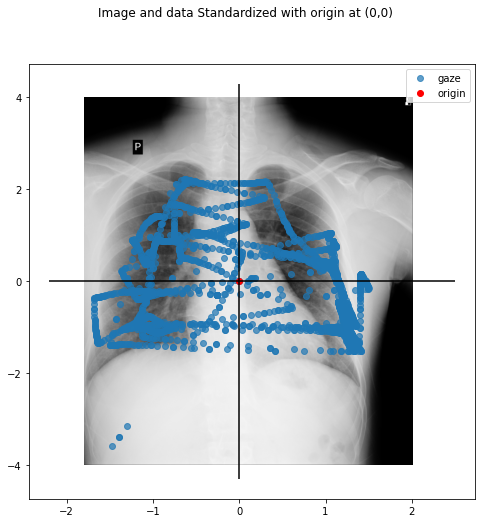

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
plt.scatter(scaled_data['x'], scaled_data['y'].apply(lambda y: -y), alpha=0.7, label="gaze")
plt.vlines(0, ymin=-4.3, ymax=4.3, colors ='black')
plt.hlines(0, xmin=-2.2, xmax=2.5, colors ='black')
plt.scatter(0,0, c='r', label='origin')
plt.suptitle("Image and data Standardized with origin at (0,0)")
# plt.axis('off')
plt.legend()
plt.show()

I have also plotted an XY coordinates at (x,0) and (0,y) ==> (0,0) to seperate the view of left, right, top and bottom as origin. 

Note: Origin is adjusted according to the center of the gaze coordiantes but not the image. You might find the image is a little away from the origin towards right than towards left of the plot. This is because the limbs of the person are captured on the right side of the image but not on the left and the gaze coordinates are focusing on the lungs of the xray report. 

### Outliers 

There are some outliers at the bottom left of the image. The gaze coordinates look like the image shown below once the outliers are removed.

In [17]:
scaled_data.loc[(scaled_data['y'] > 2.5)&(scaled_data['x']<-1)].shape

(4, 21)

In [18]:
scaled_data_outlier = scaled_data.loc[~((scaled_data['x'] < -1)&(scaled_data['y'] > 2.5))]
scaled_data.shape, scaled_data_outlier.shape

((1990, 21), (1986, 21))

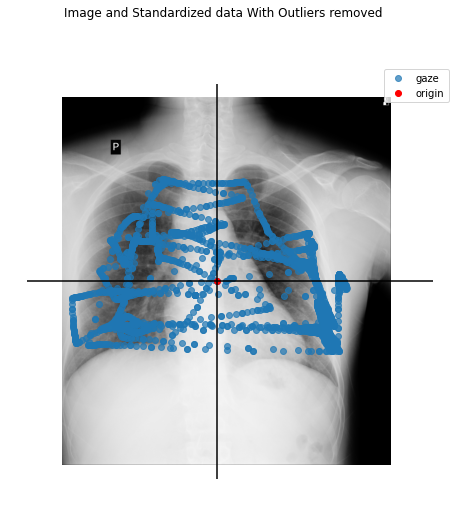

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
plt.scatter(scaled_data_outlier['x'], scaled_data_outlier['y'].apply(lambda y: -y), alpha=0.7, label="gaze")
plt.vlines(0, ymin=-4.3, ymax=4.3, colors ='black')
plt.hlines(0, xmin=-2.2, xmax=2.5, colors ='black')
plt.scatter(0,0, c='r', label='origin')
plt.suptitle("Image and Standardized data With Outliers removed")
plt.axis('off')
plt.legend()
plt.show()

The 4 points that were removed as outliers. However, I wanted to keep these outliers and see how the pattern is in the rest of the visualizations. So, the further analysis is done without removing the outliers

### Head Postion Analysis

I have leveraged the `head_pos_x/y/z` columns to understand the position of the viewer while observing the Xray. I have only considered x,y plane for now and have done an analysis on z-axis in the end. Here are the results

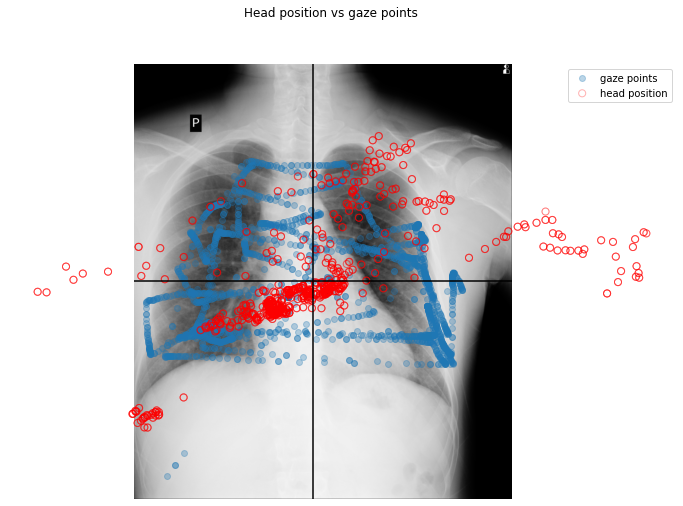

In [20]:
plt.figure(figsize=(12,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
plt.scatter(scaled_data['x'], scaled_data['y'].apply(lambda y: -y), alpha=0.3, label="gaze points")
plt.vlines(0, ymin=-4, ymax=4, colors ='black')
plt.hlines(0, xmin=-1.8, xmax=2, colors ='black')
plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y),
            s=50, facecolors='none', edgecolors='red',alpha=0.3, label='head position')
plt.axis('off')
plt.suptitle("Head position vs gaze points")
plt.legend()
plt.show()

From the plot you can observer that most of the times, viewer's head is always at the center, near origin. Also, the head is position is away from the image both in the left and right but mostly towards left. We'll look into the heatmaps to know more about this

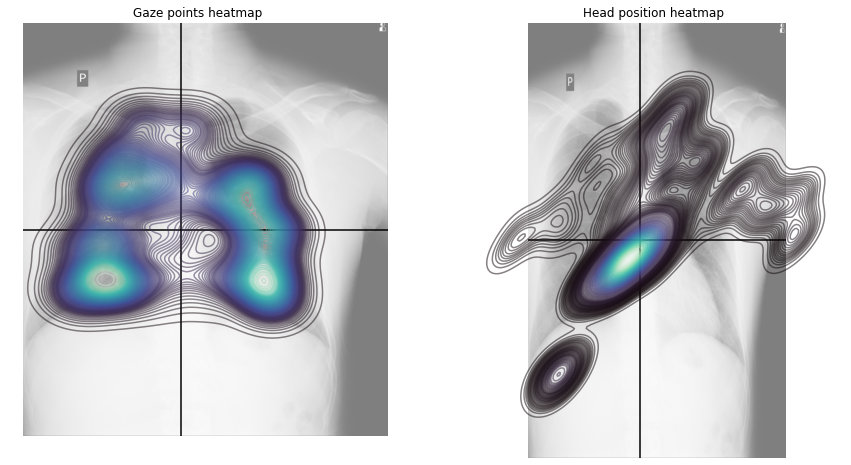

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
axs[0].vlines(0, ymin=-4, ymax=4, colors ='black')
axs[0].hlines(0, xmin=-2.3, xmax=3, colors ='black')
axs[1].vlines(0, ymin=-4, ymax=4, colors ='black')
axs[1].hlines(0, xmin=-2.3, xmax=3, colors ='black')
axs[0].imshow(img, aspect='auto', extent=(-2.3,3,-4,4), alpha=0.5)
axs[1].imshow(img, aspect='auto', extent=(-2.3,3,-4,4), alpha=0.5)
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("Gaze points heatmap")
axs[1].set_title("Head position heatmap")
sns.kdeplot(x=scaled_data['x'], y=scaled_data['y'].apply(lambda y:-y), 
            fill=False, thresh=0, levels=100, cmap="mako", ax=axs[0], alpha=0.5)
sns.kdeplot(x=scaled_data['head_pos_x'], y=scaled_data['head_pos_y'].apply(lambda y:-y), 
            fill=False, thresh=0, levels=100, cmap="mako", ax=axs[1], alpha=0.5)
plt.show()

The heatmap also clearly shows that the head position of the viewer is mostly at the center of the report. The viewer also observed scan from right, left, top and bottom. However, there position of the head is towards right lung more. Also from the heatmap of the gaze coordinates, it looks like there was more focus on the right lung than on to the left. This gives an idea that doctors tend to look at the right lung more number of time than left lung. This makes sense because, heart takes portion of the left lung in the scan and right lung could be much effective to understand the disease.

**Findings**: *From the gaze coordinates and head position, it is determined that the focus was more on right lung.*

### Head position vs Gaze point

In this analysis, I wanted to see if there is any relationship between the head position and gaze point individually in the x and y coordinates. I chose to implement a boxplot so that it would easier to understand the position of the head from above or below the origin. 

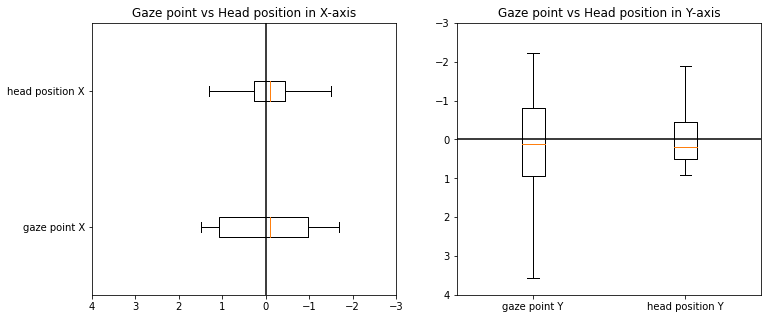

In [22]:
fig, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].boxplot([scaled_data['x'], scaled_data['head_pos_x']], labels = ['gaze point X', 'head position X'], 
               vert=False, showfliers=False)
axs[0].set_title("Gaze point vs Head position in X-axis")
# axs[0].subplots_adjust(left=0.25)
axs[0].vlines(0, ymin=0.5, ymax=2.5, colors ='black')
axs[1].boxplot([scaled_data['y'], scaled_data['head_pos_y']], labels = ['gaze point Y', 'head position Y'], 
               showfliers=False)#, vert=False)
axs[1].set_title("Gaze point vs Head position in Y-axis")
# axs[1].subplots_adjust(left=0.25)
axs[1].hlines(0, xmin=0.5, xmax=2.5, colors ='black')
axs[0].set_xlim(4,-3)
axs[1].set_ylim(4,-3)
plt.show()

The above plots could help in understanding the view of the image as well as the eye tracking. The head position in x-axis is larger than the yaxis. This represents the resolution of the scan and the screen the viewer is watching. The width of the image is larger than the height which is true in our case. So, without looking at the resultion of the image, we can estimate the dimensions of the scan report using head position and gaze point coordinates

**Findings**: *The width of the image is higher than height*

### Head rotation Analysis

The head rotation data is considered only for the x,y plane to see if there is any dependency on the eye tracking

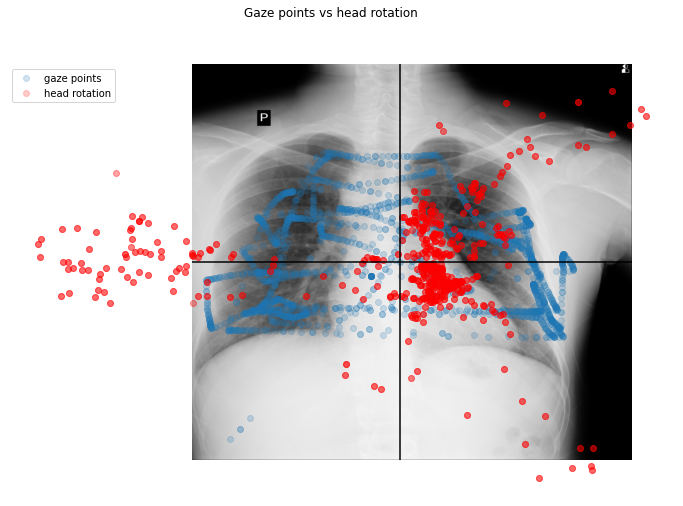

In [23]:
plt.figure(figsize=(12,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))#, zorder=-1)
plt.scatter(scaled_data['x'], scaled_data['y'].apply(lambda y: -y), alpha=0.2, label="gaze points")
plt.vlines(0, ymin=-4, ymax=4, colors ='black')
plt.hlines(0, xmin=-1.8, xmax=2, colors ='black')
# plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), c='r', alpha=0.5)
plt.scatter(scaled_data['head_rot_x'], scaled_data['head_rot_y'].apply(lambda y: -y), alpha=0.2, c='r', label="head rotation")
#             s=50, facecolors='none', edgecolors='red', alpha=0.2)
plt.axis("off")
plt.legend()
plt.suptitle("Gaze points vs head rotation")
plt.show()

The head rotation points are clustered around the origin. It is expected to be as the head position was also determined to be at around origin from above. Viewers head was not rotated many times while gazing towards right lung. But, it was rotated many times while the head position is at the left lung. Here is a plot to illustrate this statement which means, even the head position is towards the left lung, the viewer is still looking at right lung.

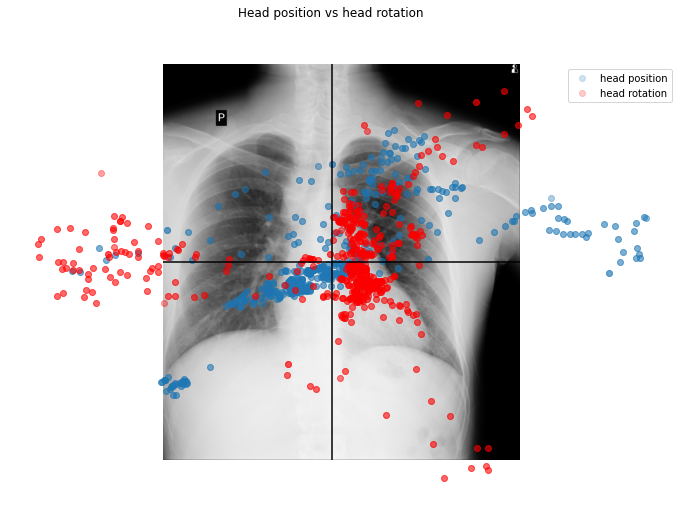

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), alpha=0.2, label="head position")
plt.vlines(0, ymin=-4, ymax=4, colors ='black')
plt.hlines(0, xmin=-1.8, xmax=2, colors ='black')
# plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), c='r', alpha=0.5)
plt.scatter(scaled_data['head_rot_x'], scaled_data['head_rot_y'].apply(lambda y: -y), alpha=0.2, c='r', label="head rotation")
#             s=50, facecolors='none', edgecolors='red', alpha=0.2)
plt.axis("off")
plt.legend()
plt.suptitle("Head position vs head rotation")
plt.show()

From the above plot between head position and head rotation, it is clear that even the head position is towards the left lung, the viewer is still gazing at the right lung by rotating the head. 

**Findings**: *Eventhough the head position is towards the left lung, the viewer is still gazing at the right lung*

### Left and Right Analysis

As there was no description about the variable in the data, I made a correlation plot to see how the `left_x/y/z` and `right_x/y/z` are related to other variables. Here is the correlation plot. 

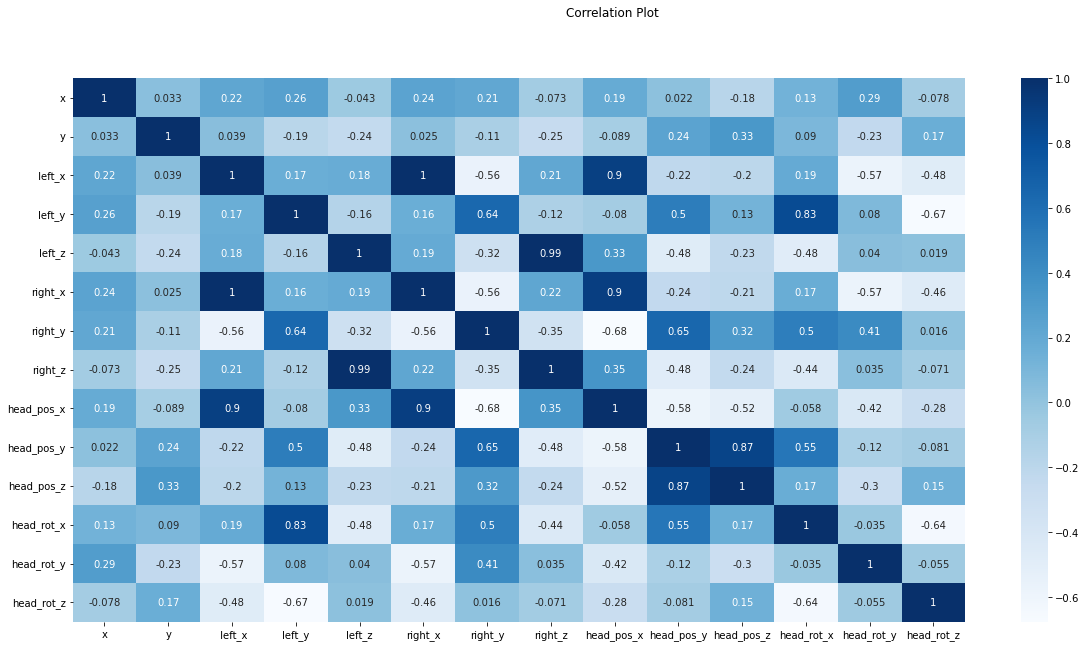

In [25]:
cols = ['x','y',' left_x','left_y', 'left_z', 'right_x','right_y', 'right_z', 'head_pos_x', 'head_pos_y', 'head_pos_z',
       'head_rot_x', 'head_rot_y', 'head_rot_z']
plt.figure(figsize=(20,10))
sns.heatmap(scaled_data[cols].corr(), cmap="Blues", annot=True)
plt.suptitle("Correlation Plot")
plt.show()

From the correlation coefficients, it looks like `left_x` and `right_x` are strongly correlated to `head_pos_x`. While `left_y` is strongly correlated with `head_pos_y` and `head_rot_x`. `right_y` is strongly correlated to `head_pos_y`. From the correlations, we can make an inference that left and right variables are describing the head position in the space. Based on this information further analysis is made. 

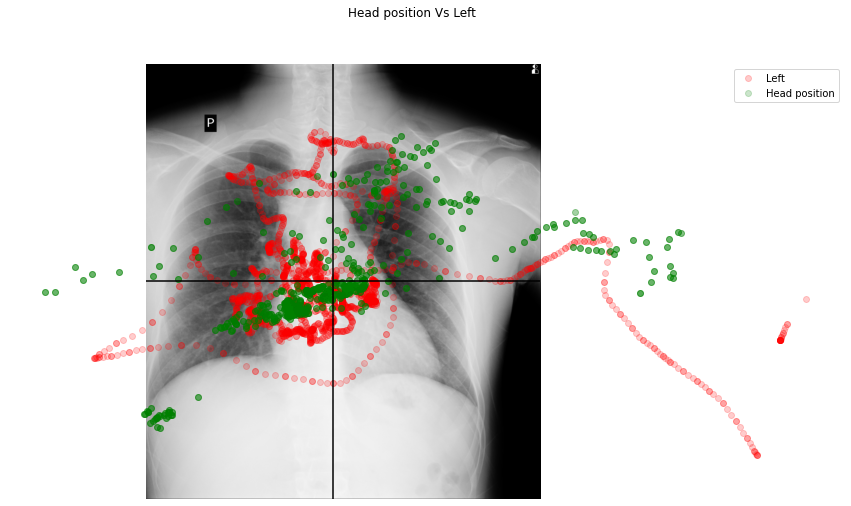

In [26]:
plt.figure(figsize=(15,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
# plt.scatter(scaled_data['x'], scaled_data['y'].apply(lambda y: -y), alpha=0.2)
plt.vlines(0, ymin=-4, ymax=4, colors ='black')
plt.hlines(0, xmin=-1.8, xmax=2, colors ='black')
plt.scatter(scaled_data[' left_x'], scaled_data['left_y'].apply(lambda y: -y), 
            c='r', alpha=0.2, label="Left")
plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), 
            c='g', alpha=0.2, label="Head position")
plt.axis('off')
plt.legend(loc='upper right')
plt.suptitle("Head position Vs Left")
plt.show()

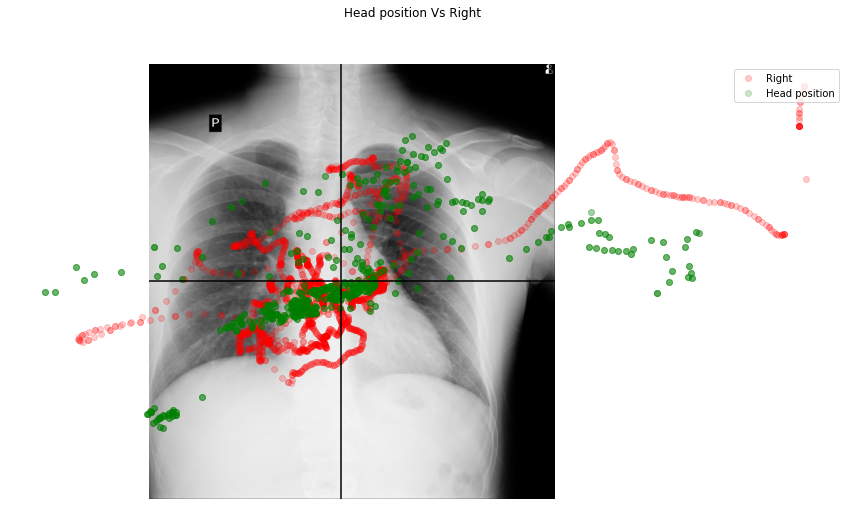

In [27]:
plt.figure(figsize=(15,8))
plt.imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
# plt.scatter(scaled_data['x'], scaled_data['y'].apply(lambda y: -y), alpha=0.2)
plt.vlines(0, ymin=-4, ymax=4, colors ='black')
plt.hlines(0, xmin=-1.8, xmax=2, colors ='black')
# plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), c='r', alpha=0.5)
plt.scatter(scaled_data['right_x'], scaled_data['right_y'].apply(lambda y: -y), 
            c='r', alpha=0.2, label="Right")
plt.scatter(scaled_data['head_pos_x'], scaled_data['head_pos_y'].apply(lambda y: -y), 
            c='g', alpha=0.2, label="Head position")
plt.axis('off')
plt.legend(loc='upper right')
plt.suptitle("Head position Vs Right")
plt.show()

It looks like the correlation between two values is because when the left coordinates are at the left of the of the image, head position is also towards the left and same goes for right.

## Statistical tests

To dig deeper into the data, I have performed one way **ANOVA test** and **Student T-test** between two the variables to see they have same population mean. This is done to see if there is any difference between group that could help in providing inferences. 

Firstly, I generated all the cominations of the variables we have. I wanted to do a two sampled ANOVA test instead of taking all samples as it would be easier to know the relationships indivually. 

I have returned the values where pvalue is significant to reject null hypothesis.

In [28]:
from scipy import stats
from itertools import combinations

for colA, colB in combinations(cols, 2):
    p = stats.f_oneway(df[colA], df[colB]).pvalue
    if p != 0:
        print("ANOVA")
        print(colA, colB)
        print(stats.f_oneway(df[colA], df[colB]).pvalue)
    p = stats.ttest_ind(df[colA], df[colB]).pvalue
    if p != 0:
        print("T-test")
        print(colA, colB)
        print(stats.ttest_ind(df[colA], df[colB]).pvalue)

ANOVA
left_y right_y
1.117368831067996e-30
T-test
left_y right_y
1.1173688310734059e-30
ANOVA
left_z right_z
4.852521347119158e-196
T-test
left_z right_z
4.852521347147771e-196


The ANOVA and T-test agreed to each other and, it looks like (left_x, right_x), (left_y, right_y) and (left_z, right_z) are not independent and have same mean. 

Extracted the correlation values here again.

In [29]:
scaled_data[[' left_x', 'right_x', 'left_y', 'right_y', 'left_z', 'right_z']].corr()

,left_x,right_x,left_y,right_y,left_z,right_z
left_x,1.000000,0.998179,0.165316,-0.562425,0.179074,0.212003
right_x,0.998179,1.000000,0.162101,-0.560677,0.191755,0.222950
left_y,0.165316,0.162101,1.000000,0.636084,-0.164513,-0.121902
right_y,-0.562425,-0.560677,0.636084,1.000000,-0.321240,-0.347053
left_z,0.179074,0.191755,-0.164513,-0.321240,1.000000,0.993830
right_z,0.212003,0.222950,-0.121902,-0.347053,0.993830,1.000000


From correlation coefficient, it is clear that (left_x and right_x) are very strongly correlated. Similarly (left_z and right_z) have a very strong correlation. I have created a pair plot to see the dependencies

Text(0.5, 1.0, 'left_z vs right_z')

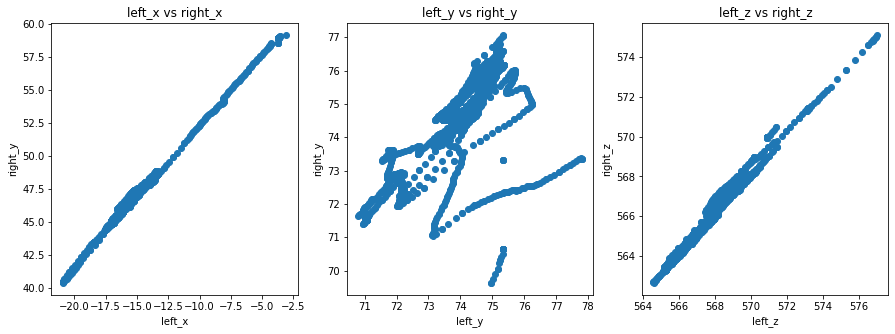

In [30]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].scatter(df[' left_x'], df['right_x'])
axs[0].set(xlabel='left_x', ylabel='right_y')
axs[0].set_title("left_x vs right_x")
axs[1].scatter(df['left_y'], df['right_y'])
axs[1].set(xlabel='left_y', ylabel='right_y')
axs[1].set_title("left_y vs right_y")
axs[2].scatter(df['left_z'], df['right_z'])
axs[2].set(xlabel='left_z', ylabel='right_z')
axs[2].set_title("left_z vs right_z")

It looks like the values are linearly dependent on each other. 

In [31]:
from mpl_toolkits import mplot3d

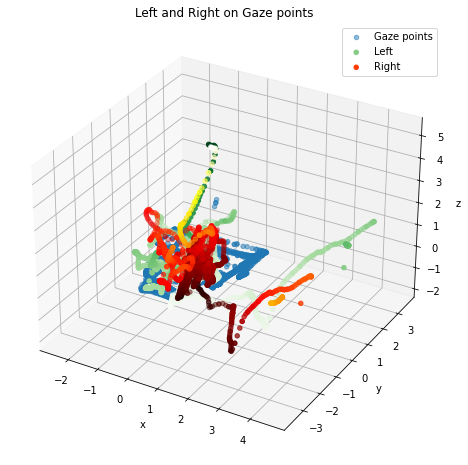

In [32]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter(scaled_data['x'], scaled_data['y'], zs=0, zdir='z', label='Gaze points', alpha=0.5)
# ax.imshow(img, aspect='auto', interpolation='nearest', extent=[0,0.5,0,0.5])
ax.scatter3D(scaled_data[' left_x'], scaled_data['left_y'], scaled_data['left_z'], 
             cmap='Greens', c=scaled_data['left_z'], label='Left')
ax.scatter3D(scaled_data['right_x'], scaled_data['right_y'], scaled_data['right_z'], 
             cmap='hot', c=scaled_data['right_z'], label='Right')
plt.legend()
plt.title("Left and Right on Gaze points")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In the 3D plots, there looks a good spike towards the z axis and the point in the z axis for left and right are almost overlapping.

I visualized the data of z axis and compared it with the gaze points to make a detailed analysis on the spike on the z axis. To do so, I firstly seperated the data of those values where there z values are higher than 3 both in the left and right data. This is done to see where the viewer is looking at the image when moving head backwards. 

In [33]:
left_analysis = scaled_data.loc[scaled_data['left_z'] > 3].copy()
left_analysis.shape

(43, 21)

In [34]:
right_analysis = scaled_data.loc[scaled_data['right_z'] > 3].copy()
right_analysis.shape

(32, 21)

The plot is extracted by applying the filter where z-axis is is higher along with the gaze points. 

Text(0.5, 1.0, 'Right-z vs gaze points')

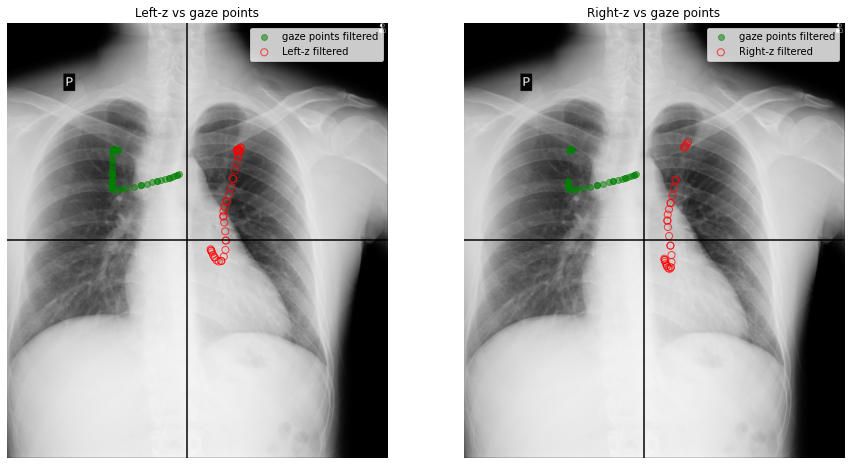

In [35]:
# plt.figure(figsize=(8,5))
fig, axs = plt.subplots(1,2, figsize=(15, 8))
axs[0].imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
axs[0].vlines(0, ymin=-4, ymax=4, colors ='black')
axs[0].hlines(0, xmin=-1.8, xmax=2, colors ='black')
axs[0].scatter(left_analysis['x'], left_analysis['y'].apply(lambda y: -y), c='g', alpha=0.5, label='gaze points filtered')
axs[0].scatter(left_analysis[' left_x'], left_analysis['left_y'].apply(lambda y: -y), 
            s=50, facecolors='none', edgecolors='red', alpha=0.7, label="Left-z filtered")
axs[0].axis('off')
axs[0].legend(loc='upper right')
axs[0].set_title("Left-z vs gaze points")
axs[1].imshow(img, aspect='auto', extent=(-1.8,2,-4,4))
axs[1].vlines(0, ymin=-4, ymax=4, colors ='black')
axs[1].hlines(0, xmin=-1.8, xmax=2, colors ='black')
axs[1].scatter(right_analysis['x'], right_analysis['y'].apply(lambda y: -y), c='g', alpha=0.5, label='gaze points filtered')
plt.scatter(right_analysis['right_x'], right_analysis['right_y'].apply(lambda y: -y), 
            s=50, facecolors='none', edgecolors='red', alpha=0.7, label="Right-z filtered")
axs[1].axis('off')
axs[1].legend(loc='upper right')
axs[1].set_title("Right-z vs gaze points")

From 2d plot it is not clear on how the viewer is looking. However, this 2d plot gives an idea that when the viewer is going backwards in z-axis, the focus in on the top of right lung. To know better, I have generated a 3d plot. 

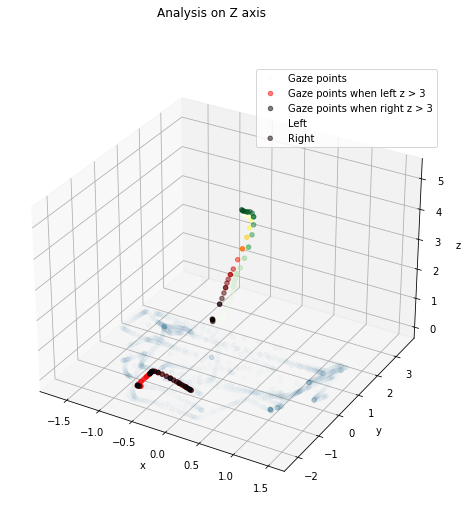

In [36]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter(scaled_data['x'], scaled_data['y'], zs=0, zdir='z', label='Gaze points', alpha=0.01)
ax.scatter(left_analysis['x'], left_analysis['y'], zs=0, zdir='z', label='Gaze points when left z > 3', alpha=0.5, c='red')
ax.scatter(right_analysis['x'], right_analysis['y'], zs=0, zdir='z', label='Gaze points when right z > 3', alpha=0.5, c='black')
# ax.imshow(img, aspect='auto', interpolation='nearest', extent=[0,0.5,0,0.5])
ax.scatter3D(left_analysis[' left_x'], left_analysis['left_y'], left_analysis['left_z'], 
             cmap='Greens', c=left_analysis['left_z'], label = 'Left', alpha=0.5)
ax.scatter3D(right_analysis['right_x'], right_analysis['right_y'], right_analysis['right_z'], 
             cmap='hot', c=right_analysis['right_z'], label='Right', alpha=0.5)
plt.legend()
plt.suptitle("Analysis on Z axis")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

From the 3d plot, it is clear that when the viewer is moving backwards in z-axis which means, the viewer is moving away from the scan both in left and right, the view point is on the top of the right lung. 

From the above analysis on gaze points, we know that there was more on focus on the bottom part of the right lung. The Radiologist must have identified an issue in the bottom right lung and focused more on the same when the head position was still. However, as the head position is moving away from the image, the focus point has shifted to top of the right lung. This could mean that we might miss the disease cause when the viewer is watching the scan far away. 

**Findings**: *The gaze point is shifts to the top as the viewer moves away from the report*

### More things to do

In this analysis, I haven't used the validity variable. It would be helpful if we could start using the validaty and select only those values that have higher validity. I have generated 3d plots using Plotly but the rendering is taking time and the size of the file is going above 500 Mb. So, I chose a static 3d polts from matplotlib.

### Extras =====>

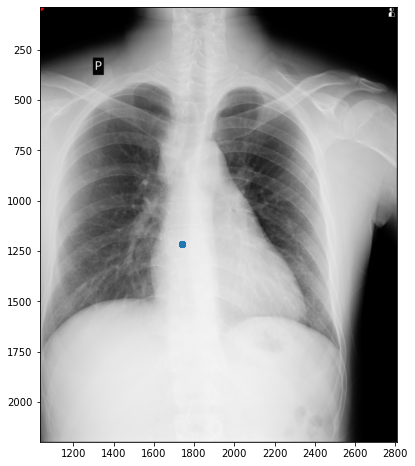

In [37]:
validity = df[df['gaze_point_validity'] == 0]
plt.figure(figsize=(8,8))
extent = [x0, img_array.shape[1]+x0, img_array.shape[0]+y0, y0]
plt.imshow(img, extent=extent)
plt.scatter(meta['x0'], meta['y0'], c='red', label='(x0,y0) as origin')
plt.scatter(validity['x'], validity['y'], label='gaze')#.apply(lambda y: -y)) .iloc[::-1]


In [38]:
df['head_pos_x'].describe()

count    1990.000000
mean        7.232475
std         2.142114
min         1.294426
25%         6.289528
50%         7.005810
75%         7.828999
max        14.411537
Name: head_pos_x, dtype: float64

In [39]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here
    
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


In [40]:
A = [(df['x'].median(), 37), (df['x'].median(), 2160+37)]
B = [(1033, df['y'].median()), (1173+1033, df['y'].median())]
origin = line_intersection(A,B)
origin

(1803.5, 1171.0)

In [41]:
headx = list(map(lambda x: x + origin[0], list(df['head_pos_x'])))
heady = list(map(lambda y: y + origin[1], list(df['head_pos_y'])))

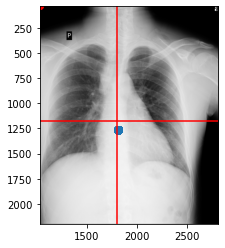

In [42]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady)
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='red')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='red')

In [43]:
headx = list(map(lambda x: x * df['x'].std(), list(df['head_pos_x'])))
heady = list(map(lambda y: y * df['y'].std(), list(df['head_pos_y'])))

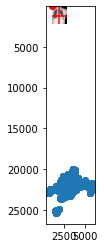

In [44]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady)
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='red')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='red')

In [45]:
df['head_pos_y'].describe()

count    1990.000000
mean       90.271405
std         4.078403
min        79.375626
25%        88.417023
50%        91.021835
75%        92.364182
max       101.236893
Name: head_pos_y, dtype: float64

In [46]:
14*df['x'].std(), 101 * df['y'].std()

(5781.38658410482, 25376.428841739104)

In [47]:
def change_range(old_value, old_range, new_range):
    new_min, new_max = new_range
    old_min,old_max = old_range
    new_value = (((old_value - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
    return new_value

In [48]:
old_range = [min(df['head_pos_x']), max(df['head_pos_x'])]
new_range = [min(df['x']), max(df['x'])]
headx = list(map(lambda x: change_range(x,old_range, new_range), list(df['head_pos_x'])))
# heady = list(map(lambda y: y * df['y'].std(), list(df['head_pos_y'])))
# headx

In [49]:
old_range = [min(df['head_pos_y']), max(df['head_pos_y'])]
new_range = [min(df['y']), max(df['y'])]
heady = list(map(lambda y: change_range(y,old_range, new_range), list(df['head_pos_y'])))
# heady

In [50]:
x0, y0, img_array.shape

(1033, 37, (2160, 1773, 3))

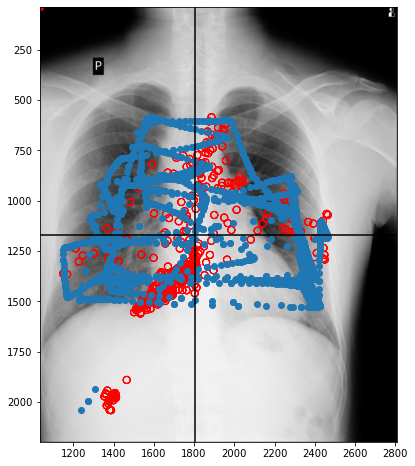

In [51]:
plt.figure(figsize=(8,8))
extent = [x0, img_array.shape[1]+x0, img_array.shape[0]+y0, y0]
plt.imshow(img, extent=extent)
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady, s=50, facecolors='none', edgecolors='red')
plt.vlines(df['x'].median(), ymin=y0, ymax=img_array.shape[0]+y0, colors ='black')
plt.hlines(df['y'].median(), xmin=x0, xmax=img_array.shape[1]+x0, colors ='black')
plt.scatter(df['x'], df['y'])
# plt.suptitle()

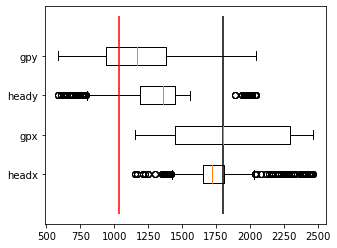

In [52]:
# sns.violinplot(y=df['head_pos_x'])
plt.boxplot([headx, df['x'], heady, df['y']], labels = ['headx', 'gpx', 'heady', 'gpy'], vert=False)
# plt.boxplot([heady, df['y']])#, vert=False)
# plt.boxplot(heady, vert=False)
plt.subplots_adjust(left=0.25)
plt.vlines(df['x'].median(), ymin=0, ymax=5, colors ='black')
plt.vlines(1033, ymin=0, ymax=5, colors ='red')
# plt.xlim([, 50])
plt.show()

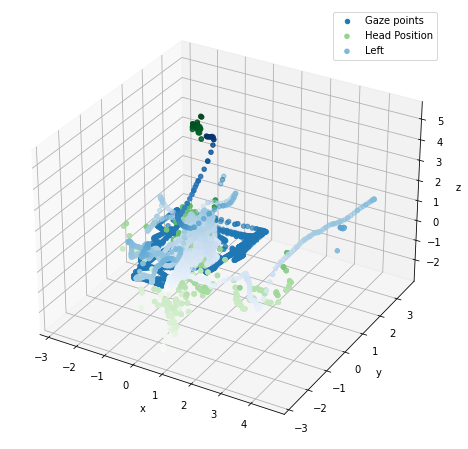

In [53]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter(scaled_data['x'], scaled_data['y'], zs=0, zdir='z', label='Gaze points')
# ax.imshow(img, aspect='auto', interpolation='nearest', extent=[0,0.5,0,0.5])
ax.scatter3D(scaled_data['head_pos_x'], scaled_data['head_pos_y'], scaled_data['head_pos_z'], 
             cmap='Greens', c=scaled_data['head_pos_z'], label='Head Position')
ax.scatter3D(scaled_data[' left_x'], scaled_data['left_y'], scaled_data['left_z'], 
             cmap='Blues', c=scaled_data['left_z'], label='Left')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### <=========